### Import Library

In [16]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline

### Load Data

In [2]:
df = pd.read_csv("./data/winequality-white.csv", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Separate the dataset into **feature matrix X** & **respoinse vector y**.

In [3]:
X_df = df.iloc[:,:-1]
X_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [4]:
X = X_df.as_matrix()
y_df = df["quality"].values

### Data Preview

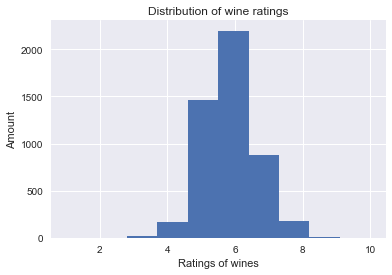

In [5]:
plt.hist(y_df, range=(1, 10))

plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.savefig('data_hist.png', format = 'png', dpi = 1000)
plt.show()

In [6]:
# sklearn can only deal with numpy arrys
Y = np.array([1 if i>=7 else 0 for i in y_df])
good_ratio = sum(Y) / len(Y)
bad_ratio = 1 - good_ratio
print('Ratio of good wine: ', good_ratio)
print('Ratio of bad wine: ', bad_ratio)

Ratio of good wine:  0.216414863209
Ratio of bad wine:  0.783585136791


### SVM Classifier Construction

Choose SVM method to do the classification.

In [7]:
#Split set into test and train
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
X_train, X_val, Y_train, Y_val = train_test_split(X_training, Y_training, test_size=0.2, random_state=20)

In [8]:
sm = SMOTE(random_state=20, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
cv_scores=[]
C=1.0

models = [
          svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=10, C=C),
          svm.SVC(kernel='poly', degree=2, C=C)]
#           svm.SVC(kernel='poly', degree=3, C=C),
#           svm.SVC(kernel='poly', degree=4, C=C))

for m in models:
    scores = cross_val_score(m, x_train_res, y_train_res, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print ("index          Score          MSE")
for i in range(len(models)):
    print ('%d          %.5f' % (i, cv_scores[i]))

index          Score          MSE
0          0.74706
1          0.90688
2          0.89521
3          0.76049
4          0.76179


In [21]:
cv_scores=[]
C=1.0

models = (
          svm.SVC(kernel='rbf', gamma=0.5, C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='rbf', gamma=0.9, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=1.2, C=C),
          svm.SVC(kernel='rbf', gamma=1.3, C=C),
          svm.SVC(kernel='rbf', gamma=1.4, C=C),
          svm.SVC(kernel='rbf', gamma=1.8, C=C),
          svm.SVC(kernel='rbf', gamma=2, C=C),
          svm.SVC(kernel='rbf', gamma=4, C=C),
          svm.SVC(kernel='rbf', gamma=10, C=C))

for m in models:
    scores = cross_val_score(m, x_train_res, y_train_res, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print ("index          Score          MSE")
for i in range(len(models)):
    print ('%d          %.5f' % (i, cv_scores[i]))

index          Score          MSE
0          0.91507
1          0.90688
2          0.90013
3          0.89521
4          0.88846
5          0.88456
6          0.88128
7          0.86469
8          0.86060
9          0.81904
10          0.76049


In [42]:
cv_scores=[]
C=1.0

models = (
          svm.SVC(kernel='rbf', gamma=0.1, C=C),
          svm.SVC(kernel='rbf', gamma=0.2, C=C),
          svm.SVC(kernel='rbf', gamma=0.3, C=C),
          svm.SVC(kernel='rbf', gamma=0.4, C=C),
          svm.SVC(kernel='rbf', gamma=0.5, C=C),
          svm.SVC(kernel='rbf', gamma=0.6, C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='rbf', gamma=0.8, C=C),
          svm.SVC(kernel='rbf', gamma=0.9, C=C),
          svm.SVC(kernel='rbf', gamma=1.0, C=C))

for m in models:
    scores = cross_val_score(m, x_train_res, y_train_res, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print ("index          Score          MSE")
for i in range(len(models)):
    print ('%d          %.5f' % (i, cv_scores[i]))

index          Score          MSE
0          0.87516
1          0.90341
2          0.91098
3          0.91343
4          0.90995
5          0.90545
6          0.90135
7          0.89644
8          0.89153
9          0.88846


In [45]:
clf_rf = svm.SVC(kernel='rbf', gamma=0.7, C=1)
clf_rf.fit(X_train, Y_train)

print ('Validation Results')
print ('confusion matrix')
print (confusion_matrix(Y_val, clf_rf.predict(X_val)))
print ("accuracy         recall        precision      f1_score")
print (accuracy_score(Y_val, clf_rf.predict(X_val)),\
       recall_score(Y_val, clf_rf.predict(X_val)),\
       precision_score(Y_val, clf_rf.predict(X_val)),\
      f1_score(Y_val, clf_rf.predict(X_val)))
print ('\nTest Results')
print ('confusion matrix')
print (confusion_matrix(Y_test, clf_rf.predict(X_test)))
print ("accuracy         recall        precision      f1_score")
print (accuracy_score(Y_test, clf_rf.predict(X_test)),\
      recall_score(Y_test, clf_rf.predict(X_test)),\
       precision_score(Y_test, clf_rf.predict(X_test)),\
      f1_score(Y_test, clf_rf.predict(X_test)))

Validation Results
confusion matrix
[[613   1]
 [114  56]]
accuracy         recall        precision      f1_score
0.853316326531 0.329411764706 0.982456140351 0.493392070485

Test Results
confusion matrix
[[780   1]
 [138  61]]
accuracy         recall        precision      f1_score
0.858163265306 0.306532663317 0.983870967742 0.467432950192


In [38]:
cv_scores=[]
C=1.0

models = (
          svm.SVC(kernel='rbf', gamma=0.4, C=1),
          svm.SVC(kernel='rbf', gamma=0.4, C=1.2),
          svm.SVC(kernel='rbf', gamma=0.4, C=1.4),
          svm.SVC(kernel='rbf', gamma=0.4, C=1.6),
          svm.SVC(kernel='rbf', gamma=0.4, C=1.8),
          svm.SVC(kernel='rbf', gamma=0.4, C=2),
          svm.SVC(kernel='rbf', gamma=0.4, C=4)
)

for m in models:
    scores = cross_val_score(m, x_train_res, y_train_res, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print ("index          Score          MSE")
for i in range(len(models)):
    print ('%d          %.5f' % (i, cv_scores[i]))

index          Score          MSE
0          0.91343
1          0.91711
2          0.91670
3          0.91711
4          0.91752
5          0.91732
6          0.91711
